# Capstone Project- Credit Card Fraud Detection

## Problem Statement: Part - I

Background: Business Understanding
In recent times, the number of fraud transactions has increased drastically due to which credit card companies are facing a lot of challenges. For many banks, retaining high profitable customers is the most important business goal. Banking fraud, however, poses a significant threat to this goal. In terms of substantial financial loss, trust, and credibility, banking fraud is a concerning issue for both banks and customers alike. With the rise in digital payment channels, the number of fraudulent transactions is also increasing as fraudsters are finding new and different ways to commit such crimes.

To download the dataset, click [here](https://www.kaggle.com/datasets/kartik2112/fraud-detection).

## Steps used to Solve the Problem

1. Importing Libraries
2. Data understanding/Data Preprocessing
3. EDA Univariate, bivariate and Multivariate
4. Preparing data for modelling
5. Logistic Regression- Without sampling/Random under sampling/oversampling/Smote
6. Decision tree- Random under sampling/oversampling/Smote
7. Random Forest- Random under sampling/oversampling/Smote
8. Conclusion

## Step no. 1- Importing Libraries

In [1]:
#importing required packages

#modelues for EDA steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modules for data cleaning and data analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

#modules for model building
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

#modules for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve

#modules for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

#setting backend for matplotlib
%matplotlib inline

#setting formatting options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)

#setting plot style
plt.style.use('seaborn-darkgrid')

## Step no 2- Data understanding/Data Preprocessing

**Loading the Data**

In [2]:
df_train = pd.read_csv('fraudTrain.csv')
df_test = pd.read_csv('fraudTest.csv')

In [3]:
df_train1=df_train.copy()
df_test1=df_test.copy()

In [4]:
#Checking head of the train data
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
#checking shape of the train and test data
print(df_train.shape)
print(df_test.shape)

(1296675, 23)
(555719, 23)


In [6]:
#Checking info of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
#Checking info of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

<span style= 'color:blue;font-size:1.5em'>**We can see there is no Null value in the train. and test dataset**</span>

In [8]:
# Dropping Unnamed column

df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
# Converting date columns to datetime format

df_train['trans_date_trans_time']=pd.to_datetime(df_train['trans_date_trans_time'])
df_train['trans_date']=df_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train['trans_date']=pd.to_datetime(df_train['trans_date'])
df_train['dob']=pd.to_datetime(df_train['dob'])

df_test['trans_date_trans_time']=pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_date']=df_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test['trans_date']=pd.to_datetime(df_test['trans_date'])
df_test['dob']=pd.to_datetime(df_test['dob'])

df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


In [10]:
#Checking info of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [11]:

#Checking info of the data
df_test.info()
     


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

Checking Unique Value

In [12]:
#checking unique count of the data
df_test.nunique()

trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
trans_date                  194
dtype: int64

In [13]:
# Total Fraudulent and non fraudulent
print('Total Transactions: {}'.format(len(df_train)))
print('   Fraudulent: {}'.format((df_train['is_fraud']==1).sum()))
print('   Non-Fraudulent: {}'.format((df_train['is_fraud']==0).sum()))

Total Transactions: 1296675
   Fraudulent: 7506
   Non-Fraudulent: 1289169


In [14]:
df_train[['merchant','gender','job']].nunique()


merchant    693
gender        2
job         494
dtype: int64

Concnating both train and test data

<span style= 'color:blue;font-size:1.5em'>**Note- We will concat the train and test data for Exploratory data analysis and for preprocessing we will apply in the combined data as well as the train and test data**</span>

In [15]:
#Concanating the train and test data
data = pd.concat([df_train,df_test])

In [16]:
# Function to calculate the distance between two adress
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [17]:
# clean date of DOB and trans_date_trans_time
dates_list = ['trans_date_trans_time','dob']
for x in dates_list:
    data[x] = pd.to_datetime(data[x])

<span style= 'color:blue;font-size:1.5em'>**No we will create the additional column for data analysis in test data train data and combined data
    new column will be trans hours, days,days of week residence and full name**</span>

In [18]:
# get hours from the transaction
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
df_train['trans_hour'] = df_train['trans_date_trans_time'].dt.hour
df_test['trans_hour'] = df_test['trans_date_trans_time'].dt.hour
# days when the transaction occured 
data['day_of_week'] =data['trans_date_trans_time'].dt.day_name()
df_train['day_of_week'] =df_train['trans_date_trans_time'].dt.day_name()
df_test['day_of_week'] =df_test['trans_date_trans_time'].dt.day_name()
# period when the transaction occured
data['year_month'] =data['trans_date_trans_time'].dt.to_period('M')
df_train['year_month'] =df_train['trans_date_trans_time'].dt.to_period('M')
df_test['year_month'] =df_test['trans_date_trans_time'].dt.to_period('M')
# the age of the client when the transaction occured
data['age'] = (np.round((data['trans_date_trans_time'] - data['dob'])/np.timedelta64(1,'Y')))
df_train['age'] = (np.round((df_train['trans_date_trans_time'] - df_train['dob'])/np.timedelta64(1,'Y')))
df_test['age'] = (np.round((df_test['trans_date_trans_time'] - df_test['dob'])/np.timedelta64(1,'Y')))
# get the full name 
data['names'] = data['first'] + ' ' + data['last']
data.drop(['first','last'], axis=1, inplace=True)
# create the column where the if the population is less than 25% to be rural, 25-50% ssemi-urban, and more than 50% urban
data['residence'] = pd.qcut(data.city_pop, q=[0, .25, .75, 1], labels=['rural', 'semi_urban', 'urban'])
df_train['residence'] = pd.qcut(df_train.city_pop, q=[0, .25, .75, 1], labels=['rural', 'semi_urban', 'urban'])
df_test['residence'] = pd.qcut(df_test.city_pop, q=[0, .25, .75, 1], labels=['rural', 'semi_urban', 'urban'])
# concanate the lat and longitude of client into one column and the same for the merchant location
data['lat_long'] = tuple(zip(*data[['lat','long']].values.T))
data['merch_ad'] = tuple(zip(*data[['merch_lat','merch_long']].values.T))


In [19]:
# create the distance column
data['distance'] = haversine_vectorize(data['long'],data['lat'],data['merch_long'],data['merch_lat'])

## Step no. 3- EDA Univariate, bivariate and Multivariate

In [20]:
# Distribution graphs (histogram/bar graph) of column data
def plotDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 30]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int(np.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)) # Convert to integer using int()
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()






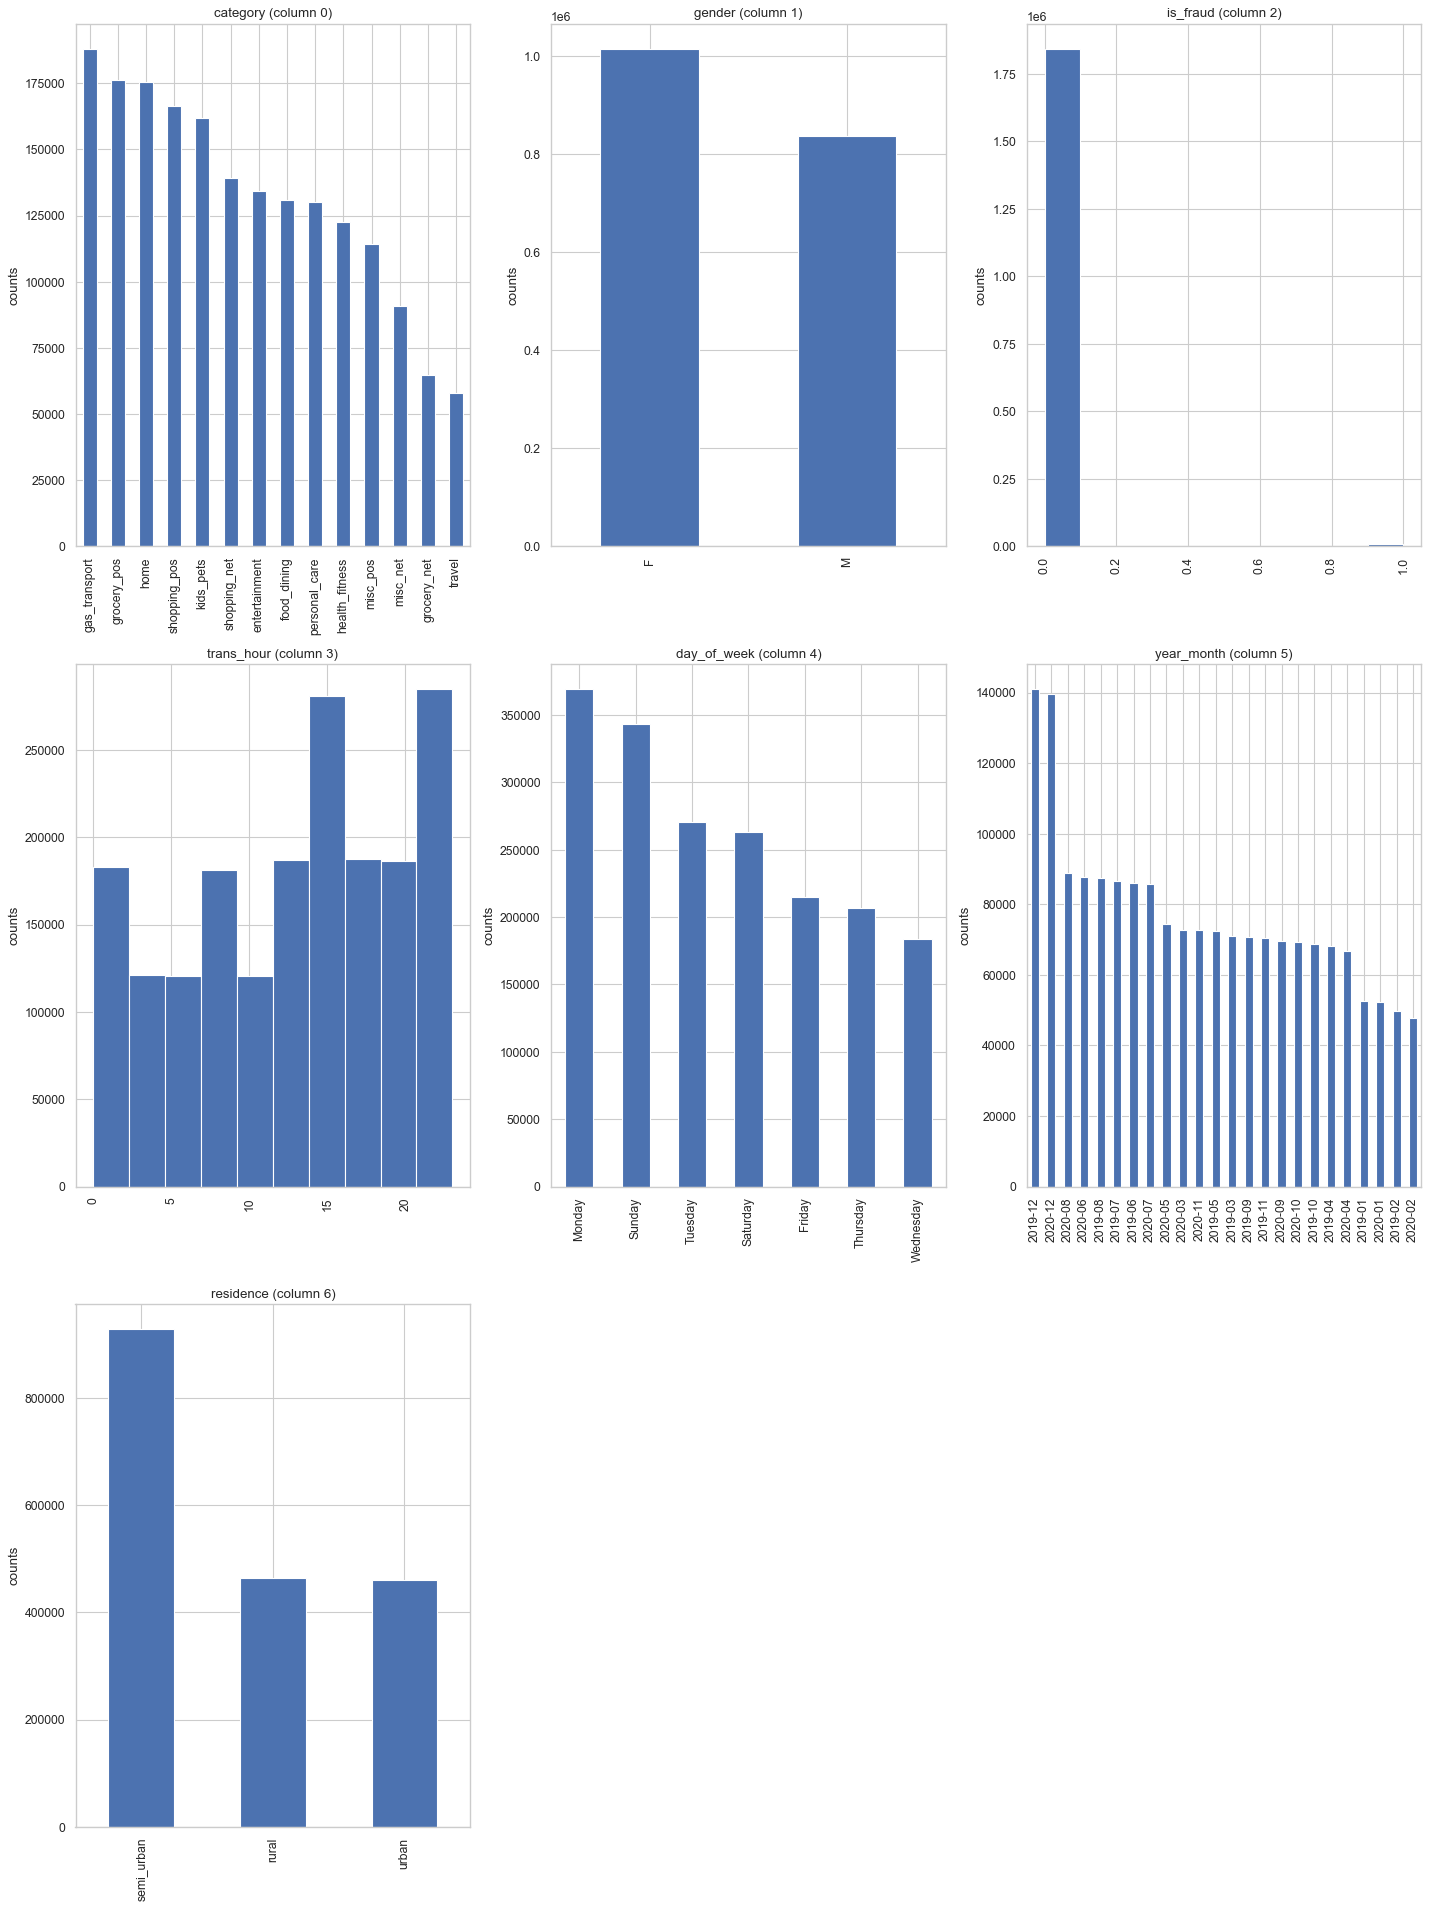

In [21]:
sns.set(style='whitegrid')
plotDistribution(data, 10, 3)

- Gas and transport is where there was the highest number of transaction, and travel the lowest
- Female made fewer transaction than male
- we can see that there are an imbalance between this dataset between the - fraudulent and non-fraudulent transaction
- we can see that more transaction are made in the night
during the week mre transaction are made monday and sunday
- we can see that at the end of year there more transaction made
The last but not least we can see that our columns are all right skewed

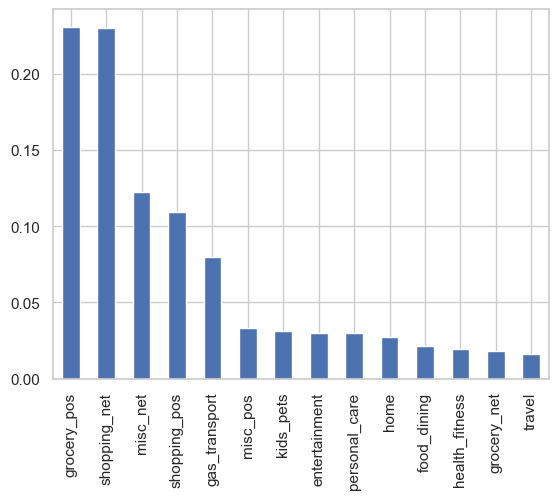

In [22]:
# checking the fraud in categeory column
data[(data['is_fraud']==1)].category.value_counts(normalize= True, ascending= False).plot(kind='bar');

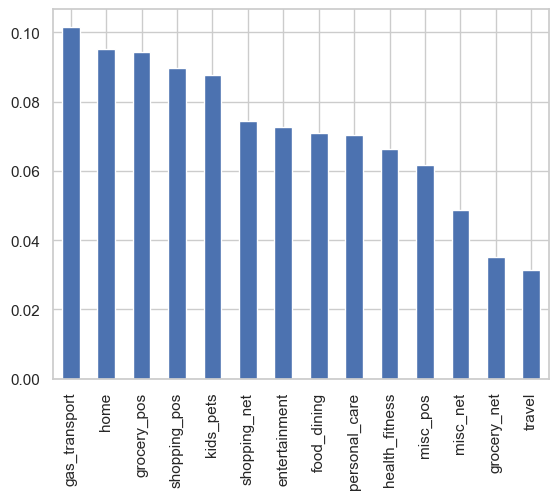

In [23]:
#Checking no frau in the categeory column
data[(data['is_fraud']==0)].category.value_counts(normalize= True, ascending= False).plot(kind='bar');

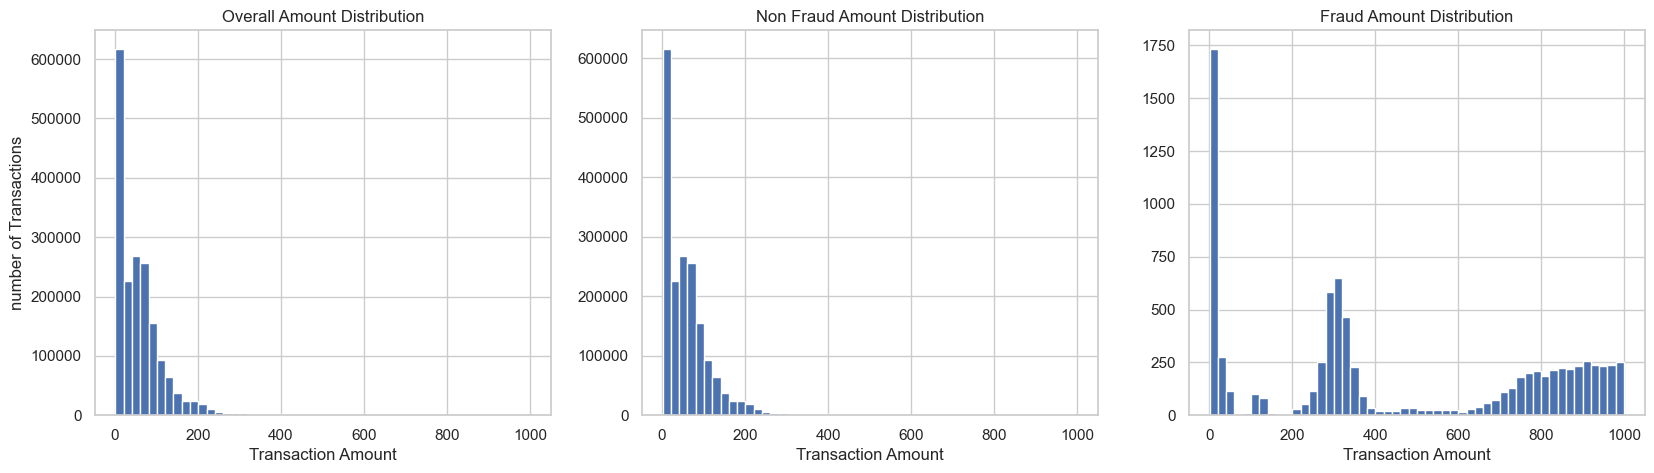

In [24]:
# checking fraud in three categeory
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(data[data['amt']<=1000]['amt'], bins=50)
ax[1].hist(data[(data['is_fraud']==0) & (data['amt']<=1000)]['amt'], bins=50)
ax[2].hist(data[(data['is_fraud']==1) & (data['amt']<=1000)]['amt'], bins=50)

ax[0].set_title('Overall Amount Distribution')
ax[1].set_title('Non Fraud Amount Distribution')
ax[2].set_title('Fraud Amount Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('number of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

**Above we can see that there are three histogram has been created ne for the overall distribution value maount < 1000**

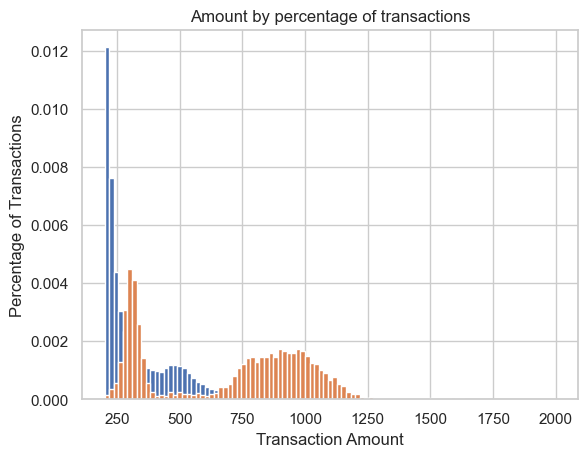

In [25]:
# visualising in linear space numpy array
bins = np.linspace(200, 2000, 100)
plt.hist(data[(data['is_fraud']==0)]['amt'], bins,alpha=1, density=True, label='Non Fraud' )
plt.hist(data[(data['is_fraud']==1)]['amt'], bins,alpha=1, density=True, label='Fraud')

plt.title('Amount by percentage of transactions')

plt.xlabel('Transaction Amount')
plt.ylabel('Percentage of Transactions')
plt.show()

**The above code helps to compare the distribution of transaction amounts for non-fraudulent and fraudulent transactions in terms of the percentage of transactions.**

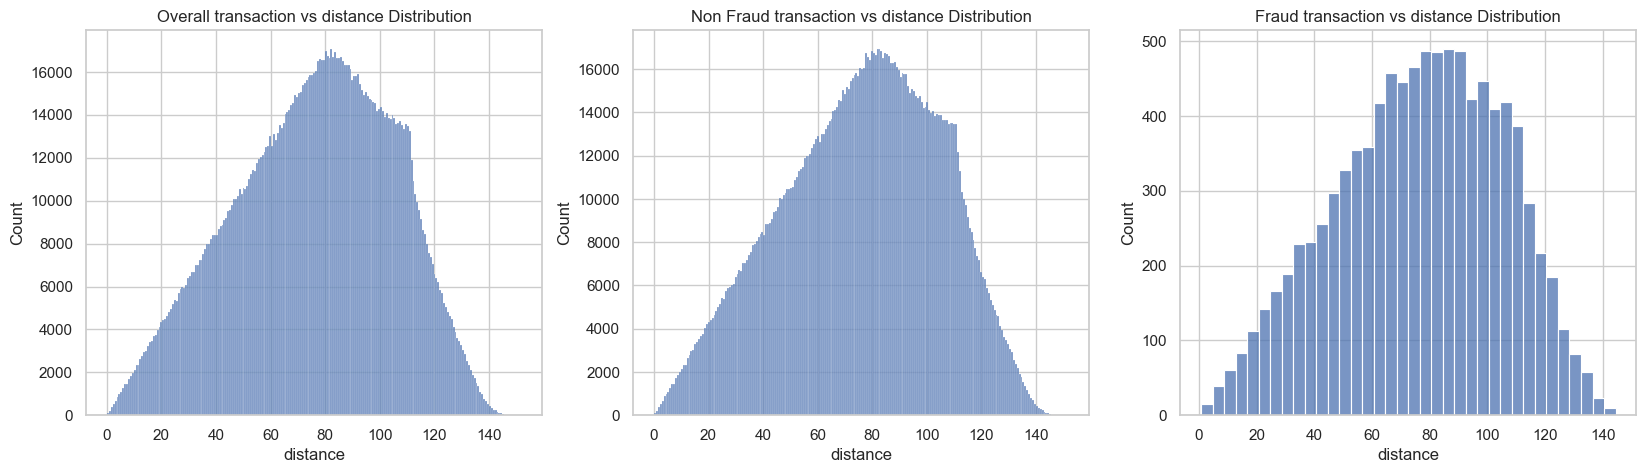

In [26]:
# Distance distribution of Overall, fradualent and non fradulent
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.histplot(data['distance'], ax= ax[0])
sns.histplot(data[(data['is_fraud']==0)].distance, ax= ax[1]) 
sns.histplot(data[(data['is_fraud']==1)].distance, ax= ax[2]) 

ax[0].set_title('Overall transaction vs distance Distribution')
ax[1].set_title('Non Fraud transaction vs distance Distribution')
ax[2].set_title('Fraud transaction vs distance Distribution')

plt.show()

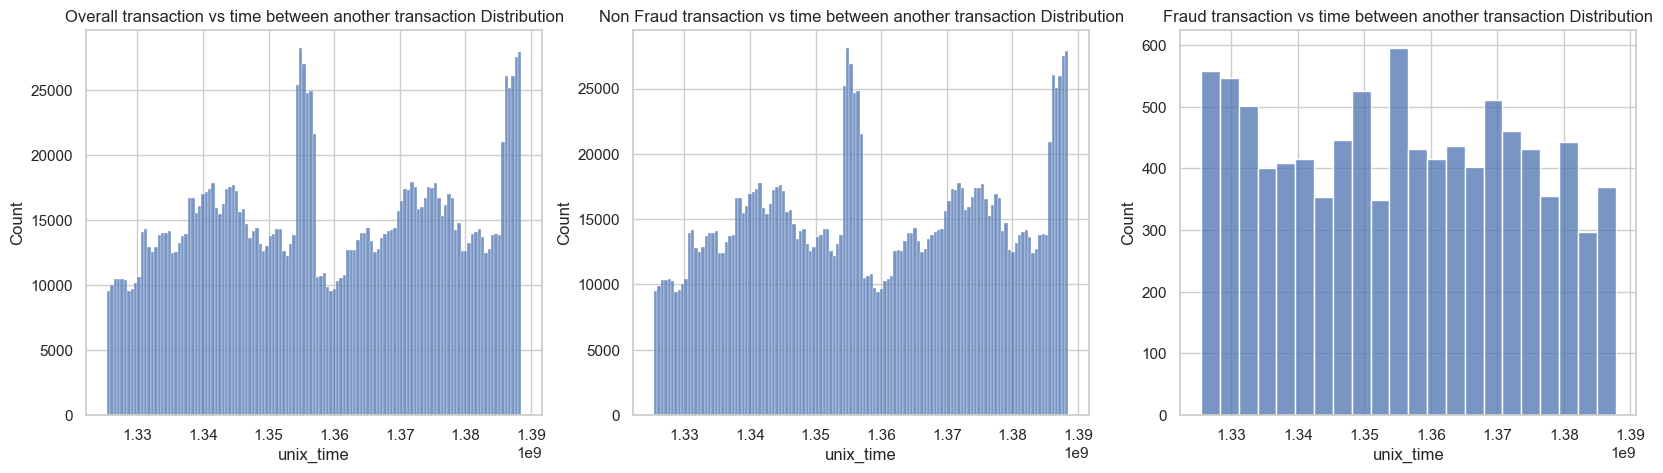

In [27]:
# distriution of the unix_time for onverall, fradualent and non fradulent
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.histplot(data['unix_time'], ax= ax[0])#age distributio
sns.histplot(data[(data['is_fraud']==0)].unix_time, ax= ax[1]) # age distribution for fraudulent transaction
sns.histplot(data[(data['is_fraud']==1)].unix_time, ax= ax[2])
ax[0].set_title('Overall transaction vs time between another transaction Distribution')
ax[1].set_title('Non Fraud transaction vs time between another transaction Distribution')
ax[2].set_title('Fraud transaction vs time between another transaction Distribution')

plt.show()

Fraudulent transaction by period

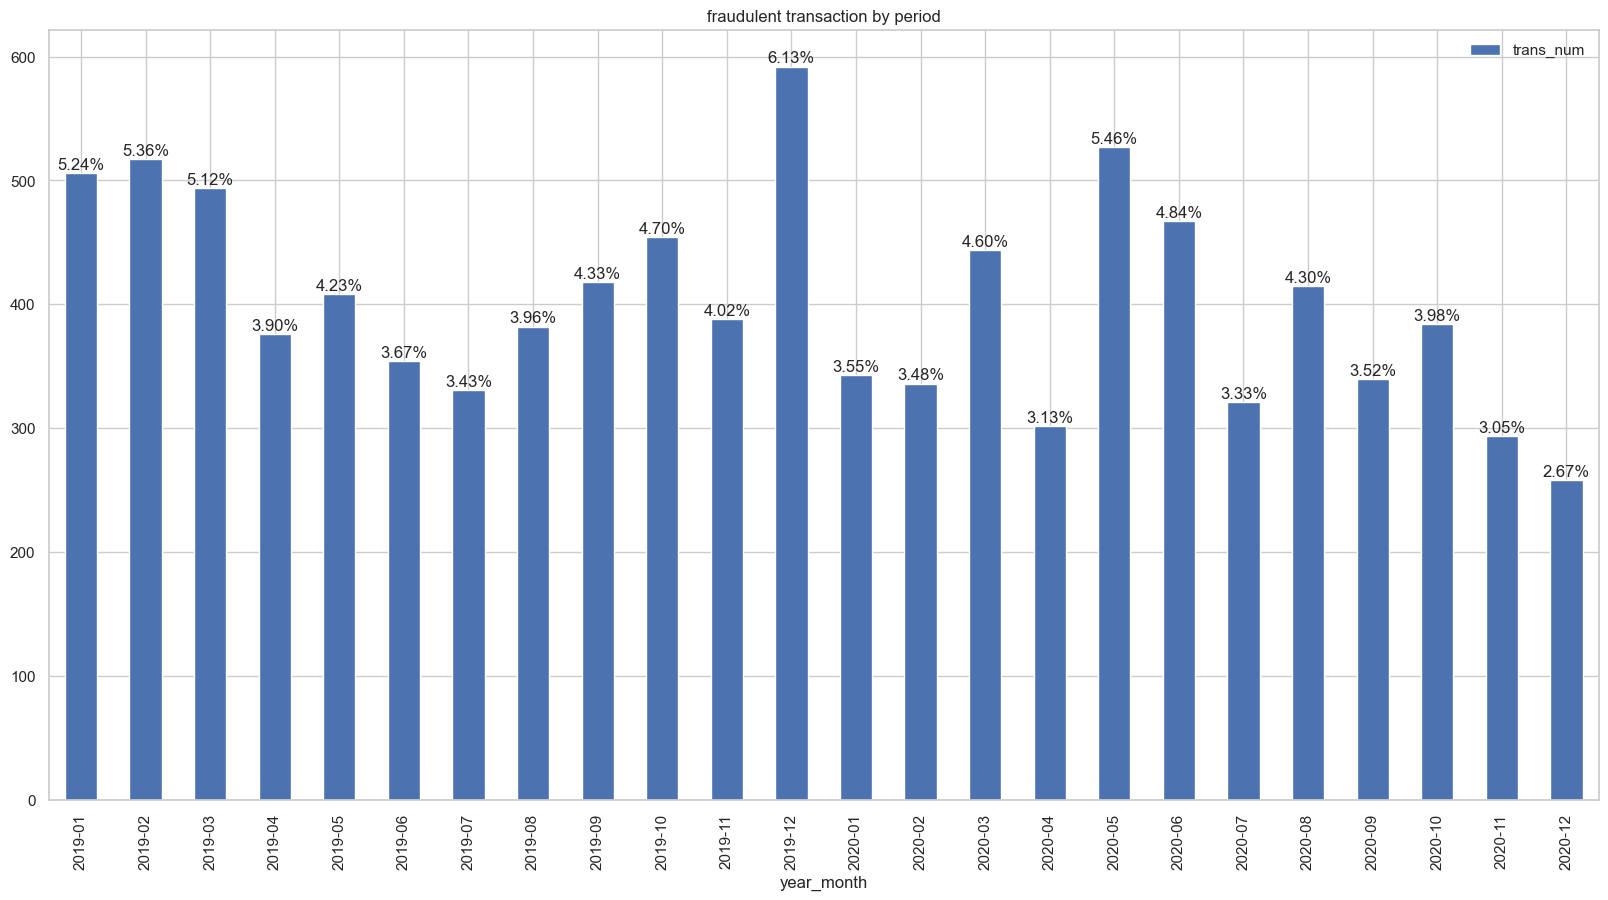

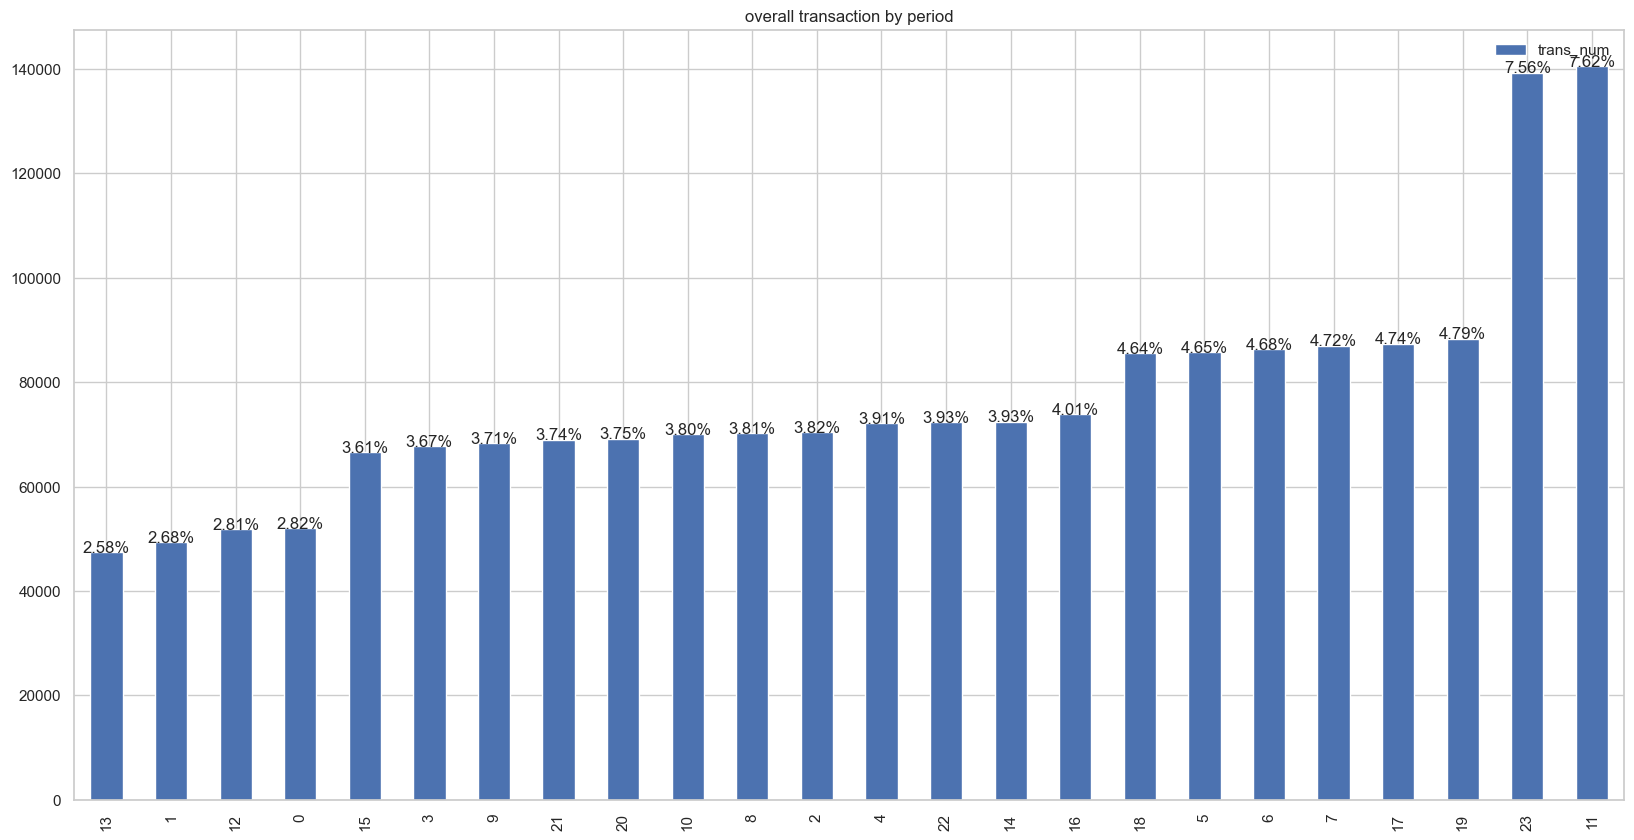

In [28]:
fraud = data[(data['is_fraud']==1)] # fraud df
not_fraud = data[(data['is_fraud']==0)] # non fraud dataframe

ax = fraud.groupby(fraud['year_month'])['trans_num'].nunique().reset_index().set_index('year_month').plot.bar(figsize=(20,10))
ax1 = not_fraud.groupby(not_fraud['year_month'])['trans_num'].nunique().reset_index().sort_values(by=['trans_num']).plot.bar(figsize=(20,10))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(fraud)*100),
            ha="center", fontsize=12)
    
for t in ax1.patches:
    height = t.get_height()
    ax1.text(t.get_x()+t.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(not_fraud)*100),
            ha="center", fontsize=12) 
ax.set_title('fraudulent transaction by period')
ax1.set_title('overall transaction by period')
plt.show()

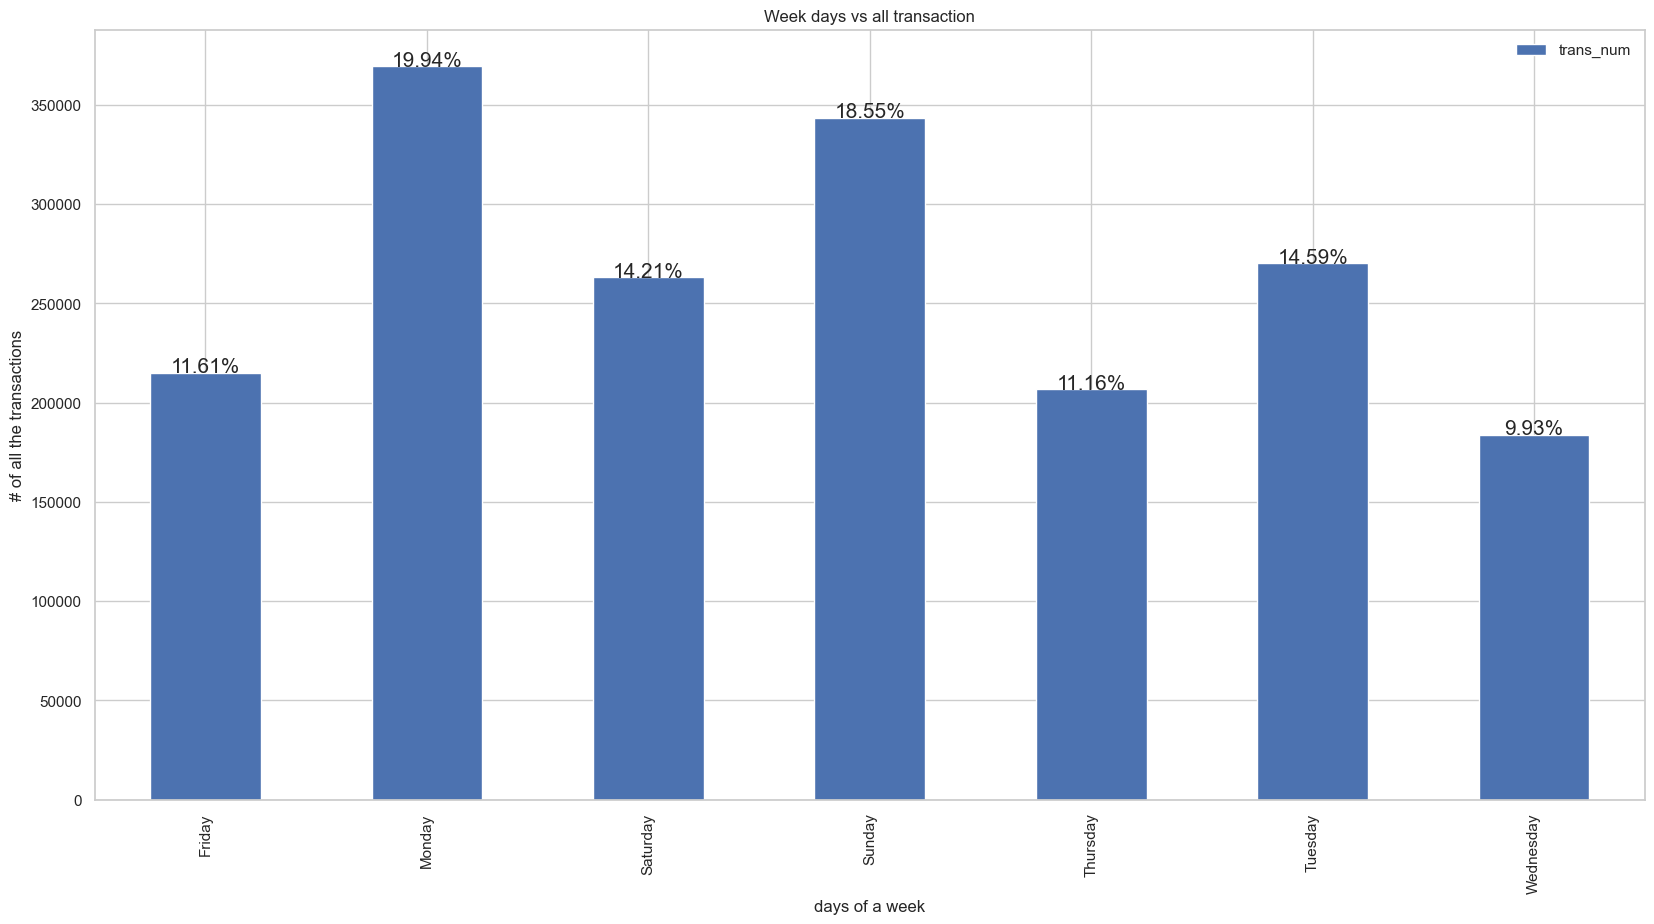

In [29]:
ax = data.groupby(data['day_of_week'])['trans_num'].nunique().reset_index().set_index('day_of_week').plot.bar(figsize=(20,10))
ax.set_ylabel('# of all the transactions')
ax.set_xlabel('days of a week')
ax.set_title('Week days vs all transaction')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=15)
plt.show()


**Multivariate analysis**

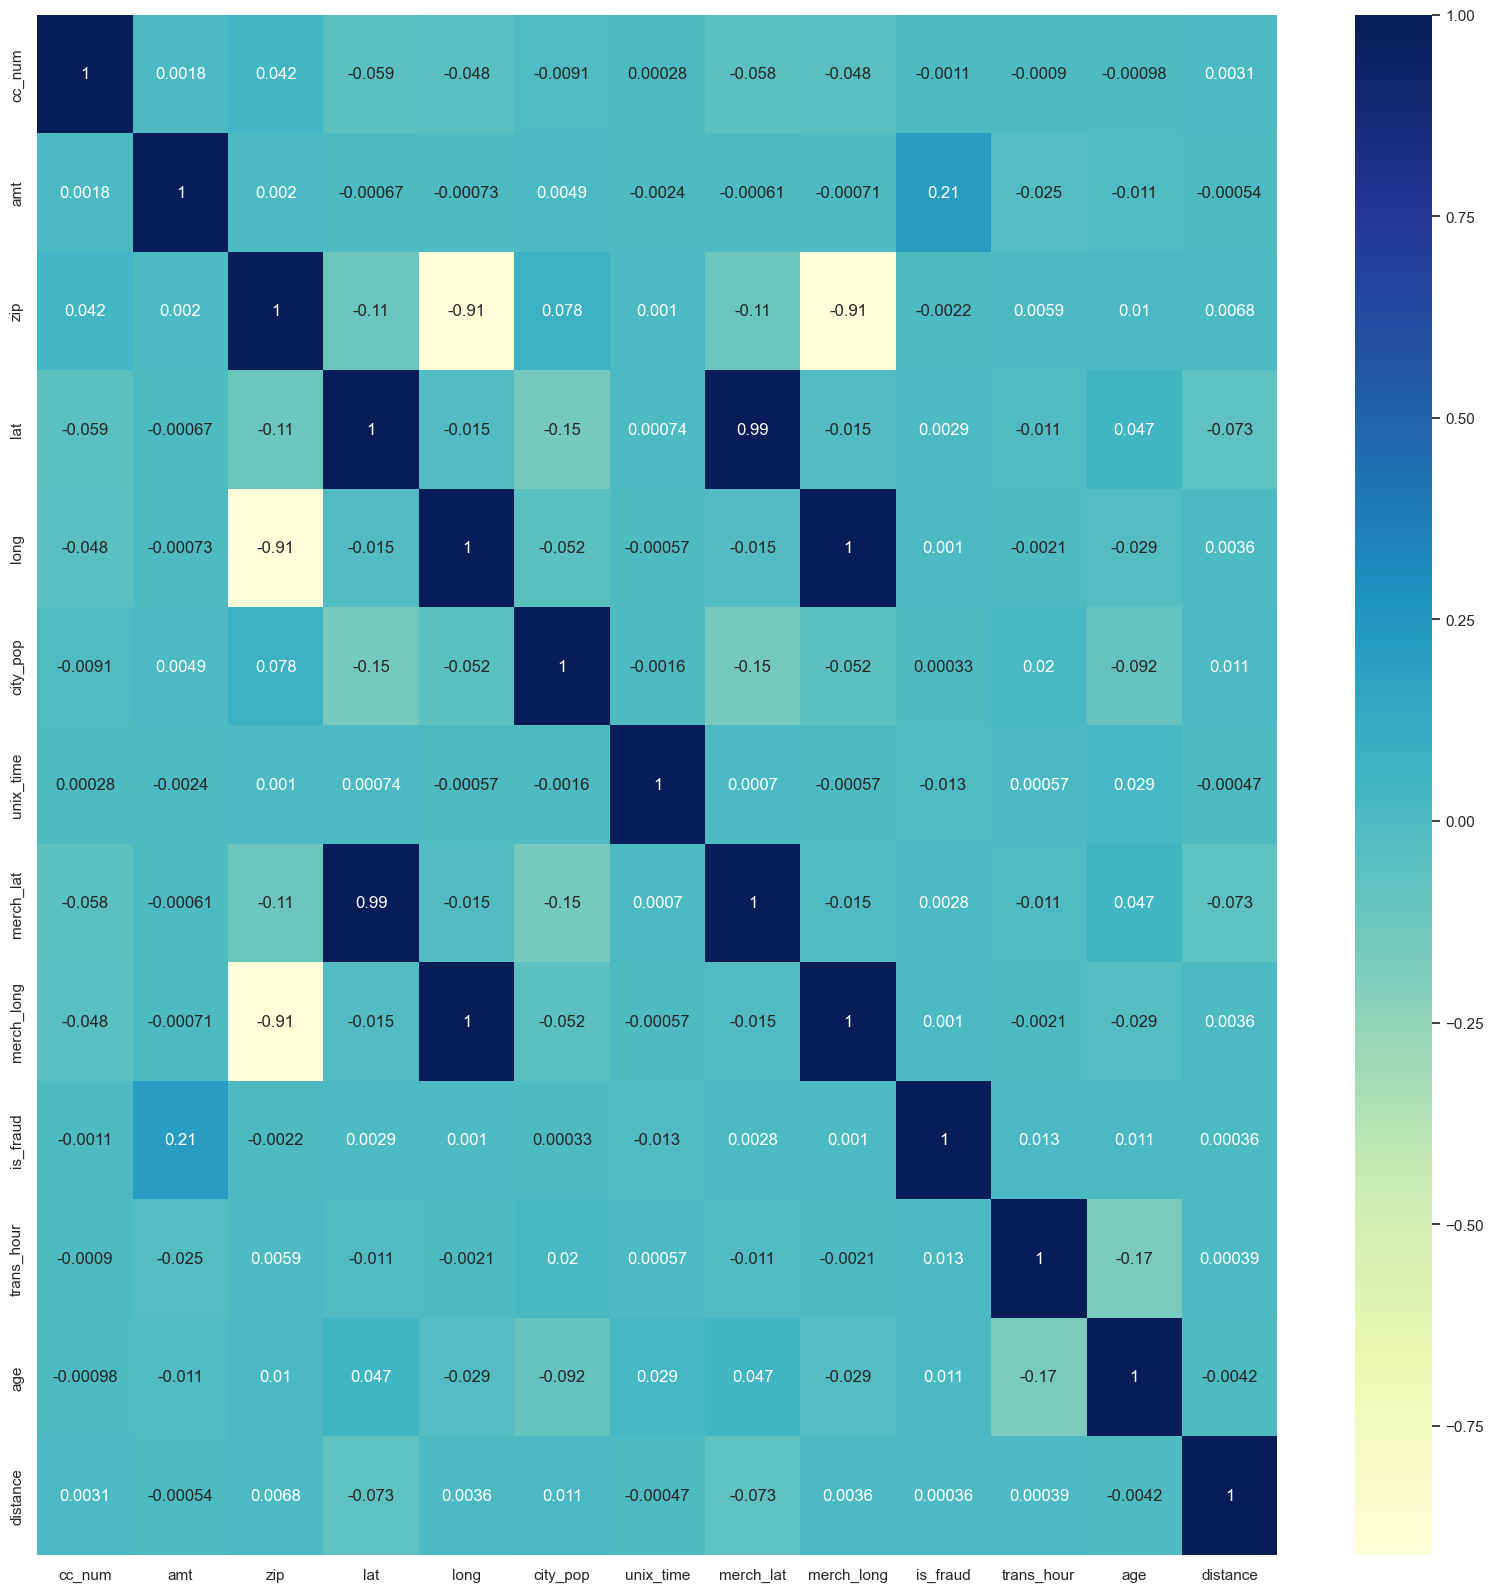

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")
plt.show()


**There is no such variable having highly co related the one have has no significance when building the model, means that will be dropped**

## Step-4 Preparing data for model building

In [31]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_hour,day_of_week,year_month,age,names,residence,lat_long,merch_ad,distance
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,0,Tuesday,2019-01,31.000000,Jennifer Banks,semi_urban,"(36.0788, -81.1781)","(36.011293, -82.048315)",78.548221
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,0,Tuesday,2019-01,41.000000,Stephanie Gill,rural,"(48.8878, -118.2105)","(49.159047, -118.186462)",30.193207
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,0,Tuesday,2019-01,57.000000,Edward Sanchez,semi_urban,"(42.1808, -112.262)","(43.150704, -112.154481)",108.138146
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,0,Tuesday,2019-01,52.000000,Jeremy White,semi_urban,"(46.2306, -112.1138)","(47.034331, -112.561071)",95.613163
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,0,Tuesday,2019-01,33.000000,Tyler Garcia,rural,"(38.4207, -79.4629)","(38.674999, -78.632459)",77.508050


In [32]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_hour,day_of_week,year_month,age,residence
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,0,Tuesday,2019-01,31.000000,semi_urban
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,0,Tuesday,2019-01,41.000000,rural
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,0,Tuesday,2019-01,57.000000,semi_urban
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,0,Tuesday,2019-01,52.000000,semi_urban
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,0,Tuesday,2019-01,33.000000,rural


In [33]:
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'trans_hour', 'day_of_week',
       'year_month', 'age', 'residence'],
      dtype='object')

<span style= 'color:blue;font-size:1.5em'>**Picking up the relevant column for the model building**</span>

In [34]:
df_train=df_train[['category','amt','gender','city_pop','is_fraud','trans_hour','day_of_week','age','residence']]
df_test=df_test[['category','amt','gender','city_pop','is_fraud','trans_hour','day_of_week','age','residence']]

In [35]:
df_train.head()

,category,amt,gender,city_pop,is_fraud,trans_hour,day_of_week,age,residence
0,misc_net,4.970000,F,3495,0,0,Tuesday,31.000000,semi_urban
1,grocery_pos,107.230000,F,149,0,0,Tuesday,41.000000,rural
2,entertainment,220.110000,M,4154,0,0,Tuesday,57.000000,semi_urban
3,gas_transport,45.000000,M,1939,0,0,Tuesday,52.000000,semi_urban
4,misc_pos,41.960000,M,99,0,0,Tuesday,33.000000,rural


<span style= 'color:blue;font-size:1.5em'>Creating dummies columns of the dataset</span>

In [36]:
columns=['category','gender','day_of_week','residence']

df_train=pd.get_dummies(df_train,columns=columns, drop_first=True)

df_test=pd.get_dummies(df_test,columns=columns, drop_first=True)

In [37]:
df_train.head()

,amt,city_pop,is_fraud,trans_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,residence_semi_urban,residence_urban
0,4.970000,3495,0,0,31.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,107.230000,149,0,0,41.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,220.110000,4154,0,0,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,45.000000,1939,0,0,52.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,41.960000,99,0,0,33.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


<span style= 'color:blue;font-size:1.5em'>Splitting data into train test split</span>

In [38]:
X_train = df_train.drop(['is_fraud'],axis=1)
y_train = df_train['is_fraud']

In [39]:
X_test = df_test.drop(['is_fraud'],axis=1)
y_test = df_test['is_fraud']

## Step-5 Logistic Regression- Without sampling/Random under sampling/oversampling/Smote

<span style= 'color:blue;font-size:1.5em'>Applying Logistic Regression</span>

In [40]:
lr = LogisticRegression(random_state=42)
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('y_train_pred: ',y_train_pred)
y_test_pred = model.predict(X_test)
print('y_test_pred: ', y_test_pred)

y_train_pred:  [0 0 0 ... 0 0 0]
y_test_pred:  [0 0 0 ... 0 0 0]


In [41]:
#evaluating the model
model_name = 'Logistic Regression - without balancing'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993762,0.995607,0.995607,0.993963,0.016340,0.002331


<span style= 'color:blue;font-size:1.5em'>We can see here ever after not applying any condition for the imbalanced dataset our accuracy of the model is quite good because our model is predicting everything as class 0. but this is not our aim to train the model in this way</span>

### Applying class balance 

In [42]:
#renaming X_test and y_test variables
test_input = X_test.copy()
test_output = y_test.copy()

test_output.value_counts(normalize=True)

0   0.996140
1   0.003860
Name: is_fraud, dtype: float64

In [43]:
#storing all fraud transactions
fraud_trans = df_train[df_train['is_fraud'] == 1]
non_fraud_trans = df_train[df_train['is_fraud'] == 0]

print('fraud data shape: ', fraud_trans.shape)
print('non fraud data shape: ', non_fraud_trans.shape)

#printing fraud data percentage
print('Fraud Data percentage: ', 100*(len(fraud_trans)/len(non_fraud_trans)))

fraud data shape:  (7506, 27)
non fraud data shape:  (1289169, 27)
Fraud Data percentage:  0.5822355331224999


<span style= 'color:blue;font-size:1.5em'> It can be seen that there is high class imbalance in the dataset we will apply the 2 method **Undersampling and Oversampling**</span>

<span style= 'color:blue;font-size:1.5em'>1) Undersampling</span>

In [44]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train,y_train)

y_rus.value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

Now we will do train test split as per the random under sampling

In [45]:
#Train test split as per random under sampling
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42, stratify=y_rus)

In [46]:
# fraud and non fraud value count in y train
y_train.value_counts()

0    5254
1    5254
Name: is_fraud, dtype: int64

now lets rebuild the linear regression model again

In [47]:
#creating a baseline linear model
lr = LogisticRegression(random_state=42)
#model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
#predicting on imbalanced test data
test_pred=model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
#printing the classification report of the model
print(classification_report(test_output,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.04      0.74      0.07      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.83      0.52    555719
weighted avg       1.00      0.93      0.96    555719



In [50]:
#evaluating the model
model_name = 'Logistic Regression - Random Under Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993762,0.995607,0.995607,0.993963,0.016340,0.002331
1,Logistic Regression - Random Under Sampling,0.832889,0.840808,0.926090,0.958078,0.037584,0.737529


It can be note although the accuracy has been dropped from the previous model but our precision and recall has been increased

<span style= 'color:blue;font-size:1.5em'>2) Oversampling</span>

In [51]:
#oversampling with imblearn
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train,y_train)

y_ros.value_counts()

0    5254
1    5254
Name: is_fraud, dtype: int64

In [52]:
#train Test split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3, stratify=y_ros, random_state=42)
y_train.value_counts()

1    3678
0    3677
Name: is_fraud, dtype: int64

In [53]:
#implementing logistic regression
lr = LogisticRegression(random_state=42)
#creating model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 1, 1, ..., 0, 0, 1])

In [54]:
test_pred = model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
#printing classification report
print(classification_report(test_output, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.04      0.73      0.07      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.83      0.52    555719
weighted avg       1.00      0.93      0.96    555719



In [56]:
#evaluating the model
model_name = 'Logistic Regression - Random Over Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993762,0.995607,0.995607,0.993963,0.016340,0.002331
1,Logistic Regression - Random Under Sampling,0.832889,0.840808,0.926090,0.958078,0.037584,0.737529
2,Logistic Regression - Random Over Sampling,0.830591,0.833809,0.930013,0.960200,0.039268,0.730070


<span style= 'color:blue;font-size:1.5em'> 3) Oversampling smote method </span>

In [57]:
#balancing using SMOTE method
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train.astype('float'), y_train)

y_sm.value_counts()

0    3678
1    3678
Name: is_fraud, dtype: int64

In [58]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm)
y_train.value_counts()

1    2575
0    2574
Name: is_fraud, dtype: int64

In [59]:
#implementing logistic regression
lr = LogisticRegression(random_state=42)
#creating model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 1, 0, 0])

In [60]:
test_pred = model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
#printing classification report
print(classification_report(test_output, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97    553574
           1       0.04      0.73      0.08      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.83      0.52    555719
weighted avg       1.00      0.93      0.96    555719



In [62]:
#evaluating the model
model_name = 'Logistic Regression - SMOTE'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993762,0.995607,0.995607,0.993963,0.016340,0.002331
1,Logistic Regression - Random Under Sampling,0.832889,0.840808,0.926090,0.958078,0.037584,0.737529
2,Logistic Regression - Random Over Sampling,0.830591,0.833809,0.930013,0.960200,0.039268,0.730070
3,Logistic Regression - SMOTE,0.831424,0.832352,0.932689,0.961643,0.040717,0.728671


AS we can see that the SMOTE mehthod is better as give the better recall

## Step-6 Decision Tree- Random under sampling/oversampling/Smote

<span style= 'color:blue;font-size:1.5em'> Decision tree- Undersampling</span>

In [63]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(max_depth=10)

model = dtree.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Decision Tree - Random Under Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.09      0.97      0.16      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.96      0.57    555719
weighted avg       1.00      0.96      0.98    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993762,0.995607,0.995607,0.993963,0.016340,0.002331
1,Logistic Regression - Random Under Sampling,0.832889,0.840808,0.926090,0.958078,0.037584,0.737529
2,Logistic Regression - Random Over Sampling,0.830591,0.833809,0.930013,0.960200,0.039268,0.730070
3,Logistic Regression - SMOTE,0.831424,0.832352,0.932689,0.961643,0.040717,0.728671
4,Decision Tree - Random Under Sampling,0.986486,0.969805,0.960475,0.976594,0.086704,0.969231


<span style= 'color:blue;font-size:1.5em'> Decision tree - Oversampling</span>

In [64]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(max_depth=10)

model = dtree.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Decision Tree - Random Over Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.08      0.97      0.15      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.96      0.56    555719
weighted avg       1.00      0.96      0.97    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993762,0.995607,0.995607,0.993963,0.016340,0.002331
1,Logistic Regression - Random Under Sampling,0.832889,0.840808,0.926090,0.958078,0.037584,0.737529
2,Logistic Regression - Random Over Sampling,0.830591,0.833809,0.930013,0.960200,0.039268,0.730070
3,Logistic Regression - SMOTE,0.831424,0.832352,0.932689,0.961643,0.040717,0.728671
4,Decision Tree - Random Under Sampling,0.986486,0.969805,0.960475,0.976594,0.086704,0.969231
5,Decision Tree - Random Over Sampling,0.984228,0.963210,0.956681,0.974570,0.079633,0.968298


<span style= 'color:blue;font-size:1.5em'>Decision tree-Smote<span>

In [65]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(max_depth=10)

model = dtree.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Decision Tree - SMOTE'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.08      0.96      0.15      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.96      0.57    555719
weighted avg       1.00      0.96      0.98    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993762,0.995607,0.995607,0.993963,0.016340,0.002331
1,Logistic Regression - Random Under Sampling,0.832889,0.840808,0.926090,0.958078,0.037584,0.737529
2,Logistic Regression - Random Over Sampling,0.830591,0.833809,0.930013,0.960200,0.039268,0.730070
3,Logistic Regression - SMOTE,0.831424,0.832352,0.932689,0.961643,0.040717,0.728671
4,Decision Tree - Random Under Sampling,0.986486,0.969805,0.960475,0.976594,0.086704,0.969231
5,Decision Tree - Random Over Sampling,0.984228,0.963210,0.956681,0.974570,0.079633,0.968298
6,Decision Tree - SMOTE,0.990678,0.958768,0.959303,0.975965,0.083635,0.958508


## Step-7 Random Forest- Random under sampling/oversampling/Smote

<span style= 'color:blue;font-size:1.5em'>Random Forest- Undersampling</span>

In [66]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, criterion='gini')

model = rf.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Random Forest - Random Under Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.14      0.96      0.24      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.97      0.62    555719
weighted avg       1.00      0.98      0.99    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993762,0.995607,0.995607,0.993963,0.016340,0.002331
1,Logistic Regression - Random Under Sampling,0.832889,0.840808,0.926090,0.958078,0.037584,0.737529
2,Logistic Regression - Random Over Sampling,0.830591,0.833809,0.930013,0.960200,0.039268,0.730070
3,Logistic Regression - SMOTE,0.831424,0.832352,0.932689,0.961643,0.040717,0.728671
4,Decision Tree - Random Under Sampling,0.986486,0.969805,0.960475,0.976594,0.086704,0.969231
5,Decision Tree - Random Over Sampling,0.984228,0.963210,0.956681,0.974570,0.079633,0.968298
6,Decision Tree - SMOTE,0.990678,0.958768,0.959303,0.975965,0.083635,0.958508
7,Random Forest - Random Under Sampling,1.000000,0.977575,0.976814,0.985349,0.138773,0.961772


<span style= 'color:blue;font-size:1.5em'>Random Forest-Oversampling</span>

In [67]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, criterion='gini')

model = rf.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Random Forest - Random Over Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.13      0.96      0.23      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.97      0.61    555719
weighted avg       1.00      0.98      0.98    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993762,0.995607,0.995607,0.993963,0.016340,0.002331
1,Logistic Regression - Random Under Sampling,0.832889,0.840808,0.926090,0.958078,0.037584,0.737529
2,Logistic Regression - Random Over Sampling,0.830591,0.833809,0.930013,0.960200,0.039268,0.730070
3,Logistic Regression - SMOTE,0.831424,0.832352,0.932689,0.961643,0.040717,0.728671
4,Decision Tree - Random Under Sampling,0.986486,0.969805,0.960475,0.976594,0.086704,0.969231
5,Decision Tree - Random Over Sampling,0.984228,0.963210,0.956681,0.974570,0.079633,0.968298
6,Decision Tree - SMOTE,0.990678,0.958768,0.959303,0.975965,0.083635,0.958508
7,Random Forest - Random Under Sampling,1.000000,0.977575,0.976814,0.985349,0.138773,0.961772
8,Random Forest - Random Over Sampling,1.000000,0.970821,0.975727,0.984760,0.133450,0.962704


<span style= 'color:blue;font-size:1.5em'>Random Forest- SMOTE</span>

In [68]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, criterion='gini')

model = rf.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Random Forest - SMOTE'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.13      0.96      0.23      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.97      0.61    555719
weighted avg       1.00      0.98      0.98    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.993762,0.995607,0.995607,0.993963,0.016340,0.002331
1,Logistic Regression - Random Under Sampling,0.832889,0.840808,0.926090,0.958078,0.037584,0.737529
2,Logistic Regression - Random Over Sampling,0.830591,0.833809,0.930013,0.960200,0.039268,0.730070
3,Logistic Regression - SMOTE,0.831424,0.832352,0.932689,0.961643,0.040717,0.728671
4,Decision Tree - Random Under Sampling,0.986486,0.969805,0.960475,0.976594,0.086704,0.969231
5,Decision Tree - Random Over Sampling,0.984228,0.963210,0.956681,0.974570,0.079633,0.968298
6,Decision Tree - SMOTE,0.990678,0.958768,0.959303,0.975965,0.083635,0.958508
7,Random Forest - Random Under Sampling,1.000000,0.977575,0.976814,0.985349,0.138773,0.961772
8,Random Forest - Random Over Sampling,1.000000,0.970821,0.975727,0.984760,0.133450,0.962704
9,Random Forest - SMOTE,1.000000,0.973720,0.975551,0.984665,0.132515,0.961772


<span style= 'color:blue;font-size:1.5em'>Features Importance of Variables</span>

In [69]:
#Converting feature score in the dataframe
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

amt                       0.553208
trans_hour                0.182629
age                       0.044419
city_pop                  0.040751
category_gas_transport    0.027678
category_shopping_net     0.019948
category_grocery_pos      0.014565
gender_M                  0.011069
category_home             0.010080
category_food_dining      0.009581
category_shopping_pos     0.009249
category_misc_net         0.007920
category_misc_pos         0.007527
category_travel           0.007474
category_kids_pets        0.006036
category_grocery_net      0.005674
residence_semi_urban      0.005345
day_of_week_Sunday        0.005306
category_personal_care    0.004992
category_health_fitness   0.004415
day_of_week_Monday        0.004337
day_of_week_Saturday      0.004013
residence_urban           0.003779
day_of_week_Tuesday       0.003498
day_of_week_Wednesday     0.003421
day_of_week_Thursday      0.003086
dtype: float64

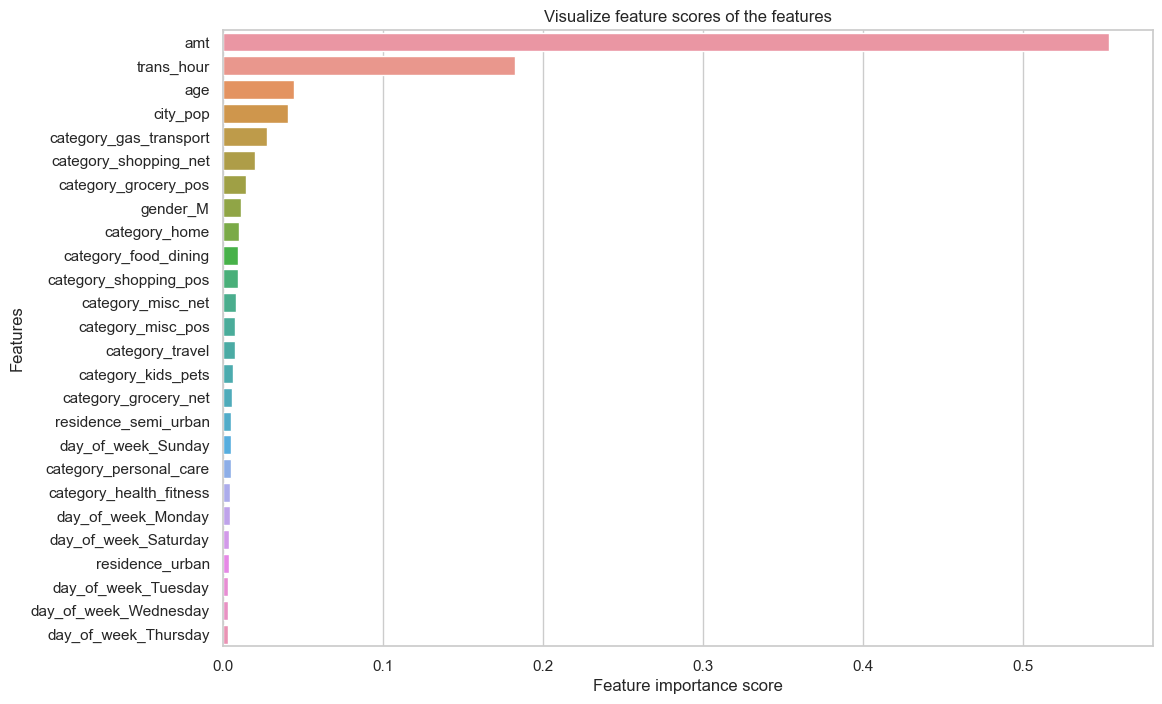

In [70]:
#Plotting the feature Imporatnace
f, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## Step- 8 Conclusion


<span style= 'color:blue;font-size:1.5em'>**EDA**</span>

- Created new column and did data understanding from the EDA to know significance of the columns by the EDA.
- Gas and transport is where there was the highest number of transaction, and travel the lowest
- Female made fewer transaction than male
- we can see that there are an imbalance between this dataset between the - fraudulent and non-fraudulent transaction
- we can see that more transaction are made in the night
during the week mre transaction are made monday and sunday
- we can see that at the end of year there more transaction made
The last but not least we can see that our columns are all right skewed

- We can see highest number of transaction took place in  month of December and every month almost percentage of transaction are same. This means that  we can ignore the Month column when building the model a there si not much learning from this variable.
- Most of the transaction took place on Sunday and Monday.



<span style= 'color:blue;font-size:1.5em'>**Model Building**</span>

- Data is highly imbalance we can see in our first model though there no sampling method applied model giving good leaning accuracy on evaluation because there are most non fraudulent and model learnt from it.
- Class imbalance- Non fraudulent – 99.42 and fraudulent- 0.58%
- Logistic regression – Precision and recall are almost same when applying random under sampling , Oversampling and SMOTE but better than applying without any sampling.
- Decision tree- preformed better than the logistic regression using all 3 method.
- Random Forest- Random forest perform better than all the model. 


## Step-9 Applying Model on the Test dataset

In [71]:
X_train_original = df_train.drop(['is_fraud'],axis=1)

In [72]:
X_test_original = df_test.drop(['is_fraud'],axis=1)

In [73]:
X_train_original.shape

(1296675, 26)

In [74]:
X_test_original.shape

(555719, 26)

In [75]:
y_train_original= df_train['is_fraud']
y_test_original = df_test['is_fraud']

In [76]:
y_train_pred = model.predict(X_train_original)
y_test_pred = model.predict(X_test_original)

print(classification_report(y_train_original, y_train_pred))
print(classification_report(y_test_original, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1289169
           1       0.19      0.98      0.32      7506

    accuracy                           0.98   1296675
   macro avg       0.60      0.98      0.65   1296675
weighted avg       1.00      0.98      0.98   1296675

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.13      0.96      0.23      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.97      0.61    555719
weighted avg       1.00      0.98      0.98    555719



## Step-10 Cost Benifit Analysis

In [77]:
df_train_merge = df_train1[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_train_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.970000,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.230000,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.110000,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.000000,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.960000,a41d7549acf90789359a9aa5346dcb46,0


In [78]:
# Creating dataframe of y_train_pred

df_train_pred = pd.DataFrame(y_train_pred)
df_train_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [79]:
# Merging the two dataframes

df_train_final = pd.concat([df_train_merge, df_train_pred],axis=1)
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,4.970000,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.230000,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.110000,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.000000,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.960000,a41d7549acf90789359a9aa5346dcb46,0,0


In [80]:
# Renaming column

df_train_final= df_train_final.rename(columns={ 0 : 'is_fraud_pred'})
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.970000,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.230000,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.110000,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.000000,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.960000,a41d7549acf90789359a9aa5346dcb46,0,0


In [81]:
df_train_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    1289169
1       7506
Name: is_fraud, dtype: int64

In [82]:
df_train_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    1258029
1      38646
Name: is_fraud_pred, dtype: int64

In [83]:
# Subset of df_test

df_test_merge = df_test1[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_test_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.860000,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.840000,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.280000,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.050000,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.190000,57ff021bd3f328f8738bb535c302a31b,0


In [84]:
# Creating dataframe of y_test_pred

df_test_pred = pd.DataFrame(y_test_pred)
df_test_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [85]:
 # Merging the two dataframes

df_test_final = pd.concat([df_test_merge, df_test_pred],axis=1)
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2.860000,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.840000,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.280000,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.050000,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.190000,57ff021bd3f328f8738bb535c302a31b,0,0


In [86]:
# Renaming column

df_test_final= df_test_final.rename(columns={ 0 : 'is_fraud_pred'})
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2020-06-21 12:14:25,2.860000,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.840000,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.280000,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.050000,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.190000,57ff021bd3f328f8738bb535c302a31b,0,0


In [87]:
df_test_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    553574
1      2145
Name: is_fraud, dtype: int64

In [88]:
df_test_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    540151
1     15568
Name: is_fraud_pred, dtype: int64

In [89]:
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.970000,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.230000,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.110000,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.000000,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.960000,a41d7549acf90789359a9aa5346dcb46,0,0


In [90]:
# Merging train and test dataset for cost benefit analysis

df_merge_final = pd.concat([df_train_final, df_test_final],axis=0)
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.970000,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.230000,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.110000,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.000000,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.960000,a41d7549acf90789359a9aa5346dcb46,0,0


In [91]:
df_merge_final.shape

(1852394, 5)

In [92]:
# Creating month and year columns

df_merge_final['month'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).month
df_merge_final['year'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).year
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:18,4.970000,0b242abb623afc578575680df30655b9,0,0,1,2019
1,2019-01-01 00:00:44,107.230000,1f76529f8574734946361c461b024d99,0,0,1,2019
2,2019-01-01 00:00:51,220.110000,a1a22d70485983eac12b5b88dad1cf95,0,0,1,2019
3,2019-01-01 00:01:16,45.000000,6b849c168bdad6f867558c3793159a81,0,0,1,2019
4,2019-01-01 00:03:06,41.960000,a41d7549acf90789359a9aa5346dcb46,0,0,1,2019


In [93]:
# Group by variable creation

g = df_merge_final.groupby(["year","month"])

In [94]:
# Number of transactions per month

g.trans_num.count()

year  month
2019  1         52525
      2         49866
      3         70939
      4         68078
      5         72532
      6         86064
      7         86596
      8         87359
      9         70652
      10        68758
      11        70421
      12       141060
2020  1         52202
      2         47791
      3         72850
      4         66892
      5         74343
      6         87805
      7         85848
      8         88759
      9         69533
      10        69348
      11        72635
      12       139538
Name: trans_num, dtype: int64

In [95]:
# Average number of transactions per month

df_merge_final.trans_num.count()/24

77183.08333333333

In [96]:
# Average Number of fraudulent transactions per month

average_fraud_per_month = df_merge_final[df_merge_final['is_fraud']==1].trans_num.count()/24
print(average_fraud_per_month)

402.125


In [97]:
# Average amount per fraud transaction

average_fraud_amt = df_merge_final[df_merge_final['is_fraud']==1].amt.mean()
print(average_fraud_amt)

530.661412288882


In [98]:
# Average number of transactions per month detected as fraud by the model

df_merge_final[df_merge_final['is_fraud_pred']==1].trans_num.count()/24

2258.9166666666665

In [99]:
# Average number of transactions per month that are fraudulent but are not detected by the model

Undetected_frauds = df_merge_final.loc[(df_merge_final.is_fraud_pred==0) & (df_merge_final.is_fraud==1)]
Undetected_frauds.trans_num.count()/24

9.958333333333334

In [100]:
# Calculating the cost incurred before deploying the model based on the first point descibed above:

cost_before_model = average_fraud_amt*average_fraud_per_month
cost_before_model

213392.2204166667

In [101]:
# Average number of transactions per month that are fraudulent but are not detected by the model

Undetected_frauds = df_merge_final.loc[(df_merge_final.is_fraud_pred==0) & (df_merge_final.is_fraud==1)]
Undetected_frauds.trans_num.count()/24

9.958333333333334

In [102]:
# Let TF be the average number of transactions per month detected as fraudulent by the model 
# Since the test dataframe has 7 months data, dividing by 7

TF = df_train_final.is_fraud_pred.sum()//7
print("Total cost of providing customer support per month for fraudulent transactions detected by the model =", TF*1.5)

Total cost of providing customer support per month for fraudulent transactions detected by the model = 8280.0


In [103]:
# Let FN be the average number of transactions per month that are fraudulent but not detected by the model
# Since the test dataframe has 7 months data, dividing by 7

FN = df_train_final[df_train_final.is_fraud_pred==0].is_fraud.sum()//7
print("Cost incurred due to these fraudulent transactions left undetected by the model =", FN*average_fraud_amt)

Cost incurred due to these fraudulent transactions left undetected by the model = 11674.551070355405


In [104]:
# Cost incurred after the model is deployed:

cost_after_model_deployed = (TF*1.5) + (FN*average_fraud_amt)
cost_after_model_deployed
print("Cost after deploying the model are: $",int(cost_after_model_deployed))

Cost after deploying the model are: $ 19954


In [105]:
# Final savings = Cost incurred before - Cost incurred after

Final_Savings_Amount = int(cost_before_model - cost_after_model_deployed)
print("Final Savings Amount after deploying the model are: $",int(Final_Savings_Amount))

Final Savings Amount after deploying the model are: $ 193437


<span style= 'color:blue;font-size:1.5em'>**Note- Test result may vary slightly due to  Random state Means training and test data will change**</span>

<span style= 'color:green;font-size:1.5em'>**Optional Video for Python file Explaination**</span>

To download Optional Video for Python file, click [here](https://drive.google.com/file/d/1ZJyG7Z34vNPOT401T_eY-7ZZxEO1rmFq/view?usp=sharing).